## Using Prophet in IOWA Alcohol Dataset

**Status:** PUBLIC Distribution <br>

**Author:** Jaume Manero IE<br>
**Date created:** 2023/02/1<br>
**Last modified:** 2023/06/15<br>
**Description:** Using Prophet in IOWA dataset

Example based on code from Claudia Carrasco

In [1]:
import pandas as pd
import gc
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
pd.set_option('display.max_columns', None)

In [2]:
# now i want to read the data in csv format include encoding and delimiter

df = pd.read_csv('Iowa_Liquor_Sales_2023.csv', encoding='latin-1', delimiter=',')

/tmp/ipykernel_15314/3603905645.py:3: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Iowa_Liquor_Sales_2023.csv', encoding='latin-1', delimiter=',')


DATA CLEANING

In [3]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [5]:
df['Year'].unique()

array([2012, 2015, 2013, 2014, 2018, 2019, 2020, 2016, 2022, 2021, 2017,
       2023])

In [6]:
df=df[df['Item Description'].str.contains('BLACK VELVET')]

df.head()

Invoice/Item Number       Date  Store Number  \
38        S13688100006 2013-08-01          3980   
40        S18248400090 2014-04-03          2663   
46        S22695000057 2014-12-02          3514   
53        S09182100046 2012-11-28          4619   
54        S19809900002 2014-06-27          4771   

                             Store Name         Address          City  \
38            WAL-MART 1721 / IOWA CITY  919 HWY 1 WEST     IOWA CITY   
40                   HY-VEE / URBANDALE    8701 DOUGLAS     URBANDALE   
46             KAREN'S SPIRITS AND WINE  328  2ND AVE S    FORT DODGE   
53  SMOKIN' JOE'S #3 TOBACCO AND LIQUOR      1737 AVE H  FORT MADISON   
54                    CENEX GAS STATION   502, E AVE NW  CEDAR RAPIDS   

   Zip Code                       Store Location  County Number   County  \
38    52246         POINT (-91.552125 41.646646)           52.0  JOHNSON   
40    50322         POINT (-93.739105 41.629364)           77.0     POLK   
46    50501         POINT (-94.192501 42.502311)           94.0  WEBSTER   
53    52627  POINT (-91.32982400000002 40.63021)           56.0      LEE   
54    52402         POINT (-91.680323 41.977958)           57.0     LINN   

     Category      Category Name  Vendor Number  \
38  1012100.0  CANADIAN WHISKIES          115.0   
40  1012100.0  CANADIAN WHISKIES          115.0   
46  1012100.0  CANADIAN WHISKIES          115.0   
53  1012100.0  CANADIAN WHISKIES          115.0   
54  1012100.0  CANADIAN WHISKIES          115.0   

                         Vendor Name Item Number            Item Description  \
38  CONSTELLATION WINE COMPANY, INC.       11788                BLACK VELVET   
40  CONSTELLATION WINE COMPANY, INC.       11773                BLACK VELVET   
46  CONSTELLATION WINE COMPANY, INC.       10553  BLACK VELVET CINNAMON RUSH   
53  CONSTELLATION WINE COMPANY, INC.       11771           BLACK VELVET MINI   
54  CONSTELLATION WINE COMPANY, INC.       11774                BLACK VELVET   

    Pack  Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
38     6                1750              10.45                15.67   
40    48                 200               1.56                 2.34   
46    12                 750               6.75                10.13   
53    10                 600               4.96                 7.44   
54    24                 375               3.07                 4.60   

    Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  Volume Sold (Gallons)  \
38            12          188.04                 21.00                   5.55   
40            12           28.08                  2.40                   0.63   
46             3           30.39                  2.25                   0.59   
53             2           14.88                  1.20                   0.32   
54            24          110.40                  9.00                   2.38   

    Year  
38  2013  
40  2014  
46  2014  
53  2012  
54  2014

In [7]:
df['Item Description'].unique()

array(['BLACK VELVET', 'BLACK VELVET CINNAMON RUSH', 'BLACK VELVET MINI',
       'BLACK VELVET TOASTED CARAMEL MINI',
       'BLACK VELVET TOASTED CARAMEL', 'BLACK VELVET TRAVELER',
       'BLACK VELVET RESERVE', 'BLACK VELVET CINNAMON RUSH MINI',
       'BLACK VELVET TOASTED CARAMEL MINI DISCO', 'BLACK VELVET PET',
       'BLACK VELVET APPLE', 'BLACK VELVET PEACH CANADIAN WHISKEY',
       'BLACK VELVET PEACH CANADIAN WHISKEY MINI',
       'BLACK VELVET APPLE MINI', 'BLACK VELVET CINNAMON RUSH DISCO',
       'BLACK VELVET  APPLE', 'BLACK VELVET CINNAMON RUSH MINI DISCO'],
      dtype=object)

In [8]:
df=df[df['Item Description'].str.contains('BLACK VELVET TOASTED')]
df = df.sort_values(by='Date')

In [9]:
df.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                   float64
Vendor Name                      object
Item Number                      object
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
Year                              int64


In [10]:
#Filter the dataframe by all the items that have the word 'BLACK VELVET' in the 'Item Description'
df1 = df[df['Item Description'].str.contains('BLACK VELVET', case=False)]

In [11]:
# We release space from huge dataset
#del [[df]]
#gc.collect()


In [12]:
df1 = df1[['Date', 'Sale (Dollars)']]
df1 = df1.rename(columns={'Date': 'ds', 'Sale (Dollars)': 'y'})



In [13]:
df1.columns

Index(['ds', 'y'], dtype='object')

In [14]:
df1 = df1.groupby([df1['ds'].dt.date]).sum().reset_index()



/tmp/ipykernel_15314/3309486354.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby([df1['ds'].dt.date]).sum().reset_index()


In [15]:
df1

ds        y
0     2012-06-27  1175.08
1     2012-06-28   324.16
2     2012-07-02  3626.54
3     2012-07-03  1053.52
4     2012-07-05  1894.31
...          ...      ...
2613  2023-03-27  4123.86
2614  2023-03-28  7899.87
2615  2023-03-29  5550.06
2616  2023-03-30  3781.74
2617  2023-03-31  5347.17

[2618 rows x 2 columns]

VISUALIZATION

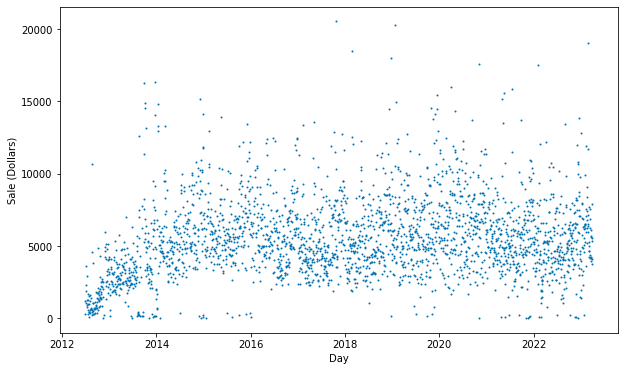

In [16]:
df1.columns = ['ds', 'y']
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df1['ds']), df1['y'], s=1, c='#0072B2')
plt.xlabel('Day')
plt.ylabel(r'Sale (Dollars)')
plt.show()

In [17]:
# Prophet instance with daily seasonality

m = Prophet(daily_seasonality=True)
m.fit(df1)


00:26:45 - cmdstanpy - INFO - Chain [1] start processing
00:26:45 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# we create future dataframe
future = m.make_future_dataframe(periods=365)
future.tail()

ds
2978 2024-03-26
2979 2024-03-27
2980 2024-03-28
2981 2024-03-29
2982 2024-03-30

In [19]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds         yhat   yhat_lower   yhat_upper
2978 2024-03-26  5837.142482  2779.057433  8766.717627
2979 2024-03-27  5005.610500  2040.080619  7933.708314
2980 2024-03-28  3475.727942   625.985769  6393.701542
2981 2024-03-29  4421.184512  1530.658434  7400.009883
2982 2024-03-30  3510.133353   811.440609  6377.880565

In [20]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
daily                                float64
daily_lower                          float64
daily_upper                          float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: obj

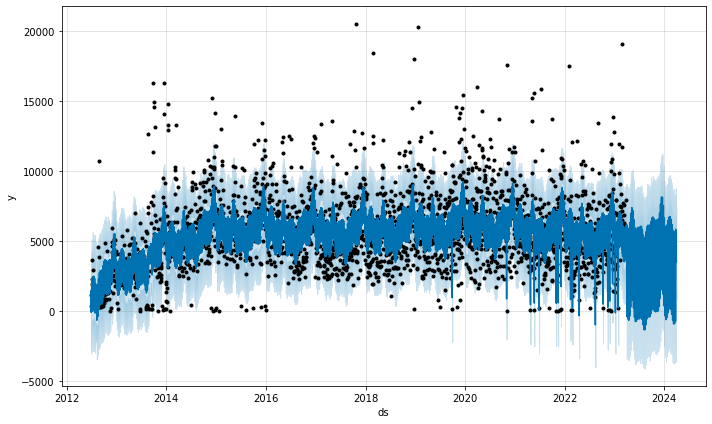

In [21]:

fig1 = m.plot(forecast)

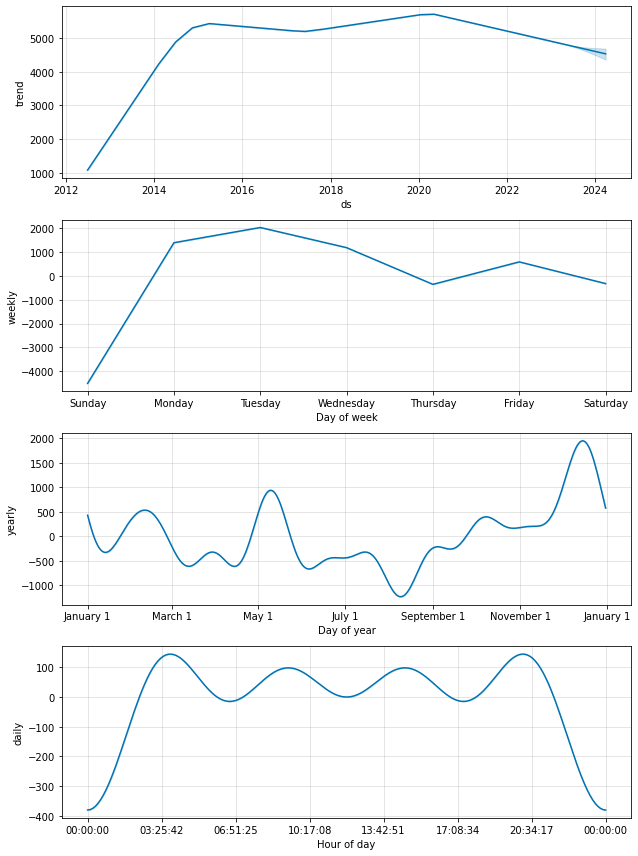

In [22]:

fig2 = m.plot_components(forecast)

In [23]:
f1 = forecast[forecast['ds'].dt.year == 2023]
forecast.shape

(2983, 22)

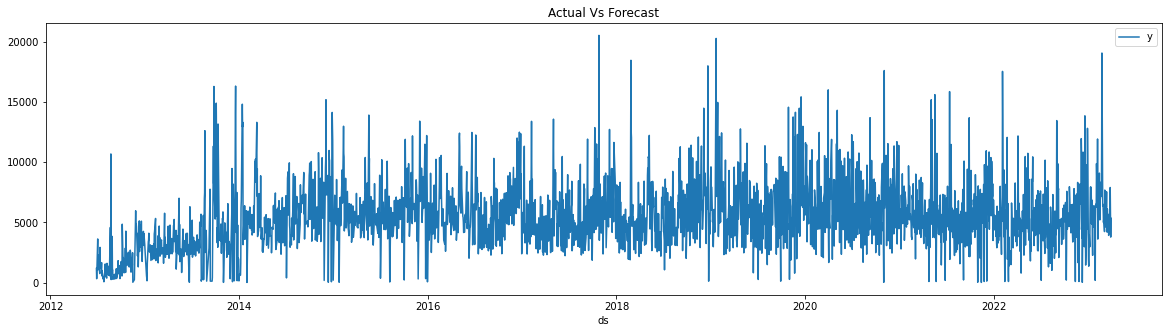

In [24]:
ax = (df1.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
#m.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

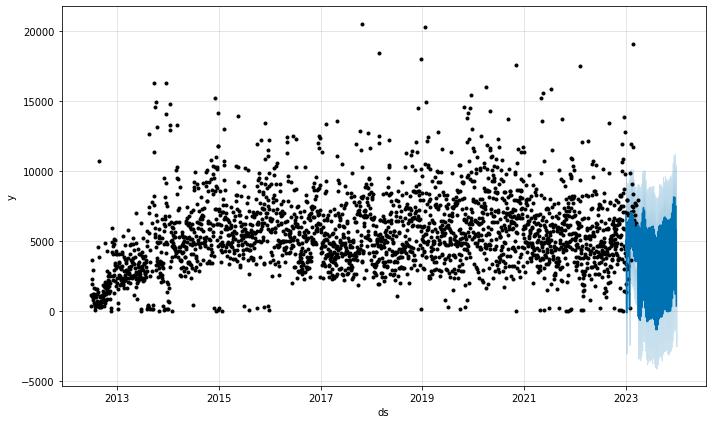

In [25]:
fig3 = m.plot(f1)

In [26]:
# Review this line
plot_plotly(m, forecast)

In [27]:
#future = m.make_future_dataframe(periods=365 * 3)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

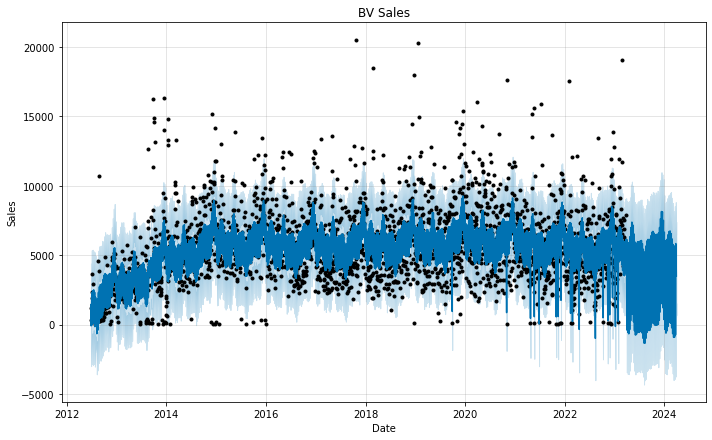

In [28]:
fig = m.plot(forecast, xlabel='Date', ylabel=r'Sales')
plt.title('BV Sales')
plt.show()

### By Week

In [52]:
df1 = df[df['Item Description'].str.contains('BLACK VELVET', case=False)]
df1 = df1[['Date', 'Sale (Dollars)']]
df1 = df1.rename(columns={'Date': 'ds', 'Sale (Dollars)': 'y'})
df1 = df1.groupby([df1['ds'].dt.date]).sum().reset_index()
df1['ds'] = pd.to_datetime(df1['ds'])
df1 = df1.set_index('ds')
df1 = df1.resample('W').sum().reset_index()

/tmp/ipykernel_15314/257436560.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [53]:
df1

ds         y
0   2012-07-01   1499.24
1   2012-07-08   8894.14
2   2012-07-15   5855.14
3   2012-07-22   4447.07
4   2012-07-29   1245.99
..         ...       ...
557 2023-03-05  29075.70
558 2023-03-12  28066.71
559 2023-03-19  28535.37
560 2023-03-26  23602.23
561 2023-04-02  26702.70

[562 rows x 2 columns]

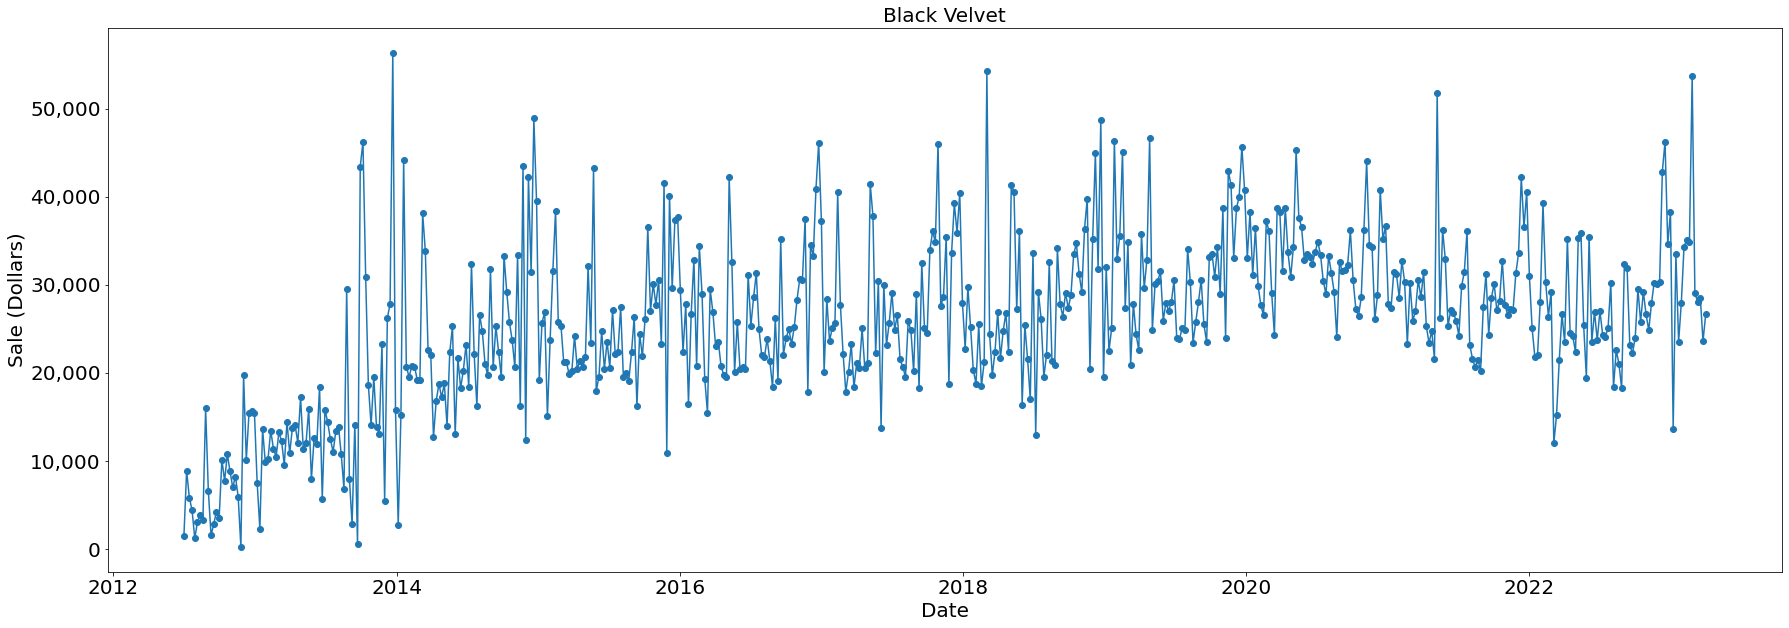

In [55]:
# Time series plot

data = df1
cat = 'Black Velvet'

x = data['ds']
y = data['y']

#pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f')

#y.plot(figsize=(30,10), color='blue').set_title(cat)
fig,ax = plt.subplots(figsize=(30,10))

plt.plot(x,y, marker='o')

# Labelling 
fmt = lambda x, pos: '{:,.0f}'.format((x), pos)
ax.yaxis.set_major_formatter(fmt)
# Display
plt.xlabel("Date", size=20)
plt.ylabel("Sale (Dollars)",size=20)
plt.title(cat, size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [57]:
model_week = Prophet(interval_width = 0.95)
model_week.fit(df1)
week_forecast = model_week.make_future_dataframe(periods=0, freq = 'M')
week_forecast = model_week.predict(week_forecast)

00:44:12 - cmdstanpy - INFO - Chain [1] start processing
00:44:12 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Black Velvet')

<Figure size 1296x432 with 0 Axes>

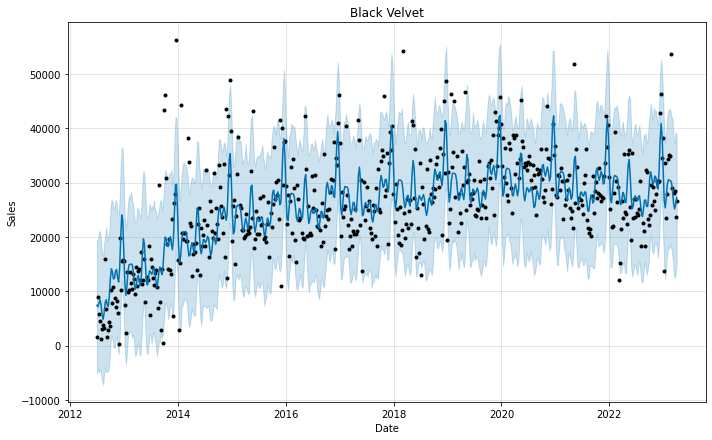

In [58]:
plt.figure(figsize=(18,6))
model_week.plot(week_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Black Velvet')

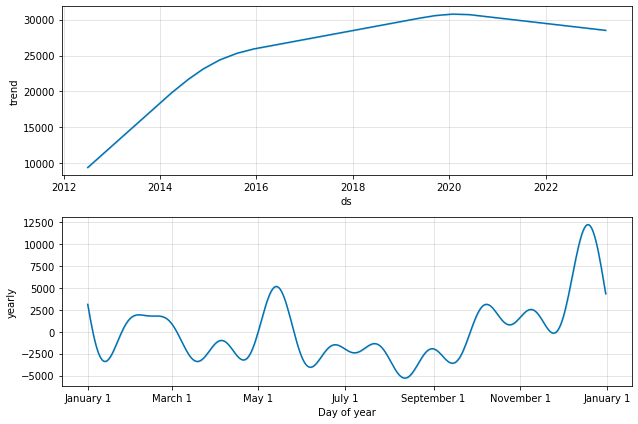

In [59]:
fig10 = model_week.plot_components(week_forecast)

In [30]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.5.0
pandas              1.5.3
plotly              5.5.0
prophet             1.1.4
session_info        1.0.0
-----
IPython             7.29.0
jupyter_client      8.2.0
jupyter_core        5.3.0
notebook            6.5.4
-----
Python 3.8.12 (default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
Linux-5.19.0-43-generic-x86_64-with-glibc2.17
-----
Session information updated at 2023-06-16 00:26
